In [95]:
# <-- Import libraries, custom functions, and load configuration & datasets <-- #

import yaml
import datetime as dt
import re
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import seaborn as sns

from statsmodels.multivariate.manova import MANOVA
from scipy import stats
from scipy.stats import pearsonr, boxcox, chi2_contingency, shapiro
from scipy.stats.contingency import association

# <-- Imports custom preprocessing functions from 'functions.py' <-- #

# from functions import ()

# <-- Loads YAML configuration to dynamically reference CSV output files. <-- #

config = None  # <-- Initialize config
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Yaml configuration file not found!")


# df_demo = pd.read_csv(config['output_data']['file1'])
df_demo_variation = pd.read_csv(config['output_data']['file2'])
df_demo_test = pd.read_csv(config['output_data']['file3'])
df_demo_control = pd.read_csv(config['output_data']['file4'])

1. Client Demographics Analysis

1.1 Age Distribution
- Histogram, boxplot, summary stats, normality test, Q-Q plot, age group barplot

1.2 Tenure
- Histogram, boxplot, summary stats, compare by gender, correlation with age

1.3 Other Variables
- Histograms and boxplots for accounts, balances, logons/calls
- Correlation matrix/heatmap

In [96]:
display(pd.DataFrame({
    "non_nulls": df_demo_variation.count(),
    "nulls": df_demo_variation.isnull().sum(),
    "total": len(df_demo_variation)
}))
print(df_demo_variation.dtypes)

,non_nulls,nulls,total
client_id,50487,0,50487
clnt_tenure_yr,50487,0,50487
clnt_tenure_mnth,50487,0,50487
clnt_age,50487,0,50487
num_accts,50487,0,50487
bal,50487,0,50487
calls_6_mnth,50487,0,50487
logons_6_mnth,50487,0,50487
Variation,50487,0,50487
clnt_age_quantile,50487,0,50487


client_id              int64
clnt_tenure_yr       float64
clnt_tenure_mnth     float64
clnt_age             float64
num_accts            float64
bal                  float64
calls_6_mnth         float64
logons_6_mnth        float64
Variation             object
clnt_age_quantile     object
tenure_quantile       object
dtype: object


In [97]:
display(pd.DataFrame({
    "non_nulls": df_demo_test.count(),
    "nulls": df_demo_test.isnull().sum(),
    "total": len(df_demo_test)
}))
print(df_demo_test.dtypes)

,non_nulls,nulls,total
client_id,26961,0,26961
clnt_tenure_yr,26961,0,26961
clnt_tenure_mnth,26961,0,26961
clnt_age,26961,0,26961
num_accts,26961,0,26961
bal,26961,0,26961
calls_6_mnth,26961,0,26961
logons_6_mnth,26961,0,26961
Variation,26961,0,26961
clnt_age_quantile,26961,0,26961


client_id              int64
clnt_tenure_yr       float64
clnt_tenure_mnth     float64
clnt_age             float64
num_accts            float64
bal                  float64
calls_6_mnth         float64
logons_6_mnth        float64
Variation             object
clnt_age_quantile     object
tenure_quantile       object
dtype: object


In [98]:
display(pd.DataFrame({
    "non_nulls": df_demo_control.count(),
    "nulls": df_demo_control.isnull().sum(),
    "total": len(df_demo_control)
}))
print(df_demo_control.dtypes)

,non_nulls,nulls,total
client_id,23526,0,23526
clnt_tenure_yr,23526,0,23526
clnt_tenure_mnth,23526,0,23526
clnt_age,23526,0,23526
num_accts,23526,0,23526
bal,23526,0,23526
calls_6_mnth,23526,0,23526
logons_6_mnth,23526,0,23526
Variation,23526,0,23526
clnt_age_quantile,23526,0,23526


client_id              int64
clnt_tenure_yr       float64
clnt_tenure_mnth     float64
clnt_age             float64
num_accts            float64
bal                  float64
calls_6_mnth         float64
logons_6_mnth        float64
Variation             object
clnt_age_quantile     object
tenure_quantile       object
dtype: object


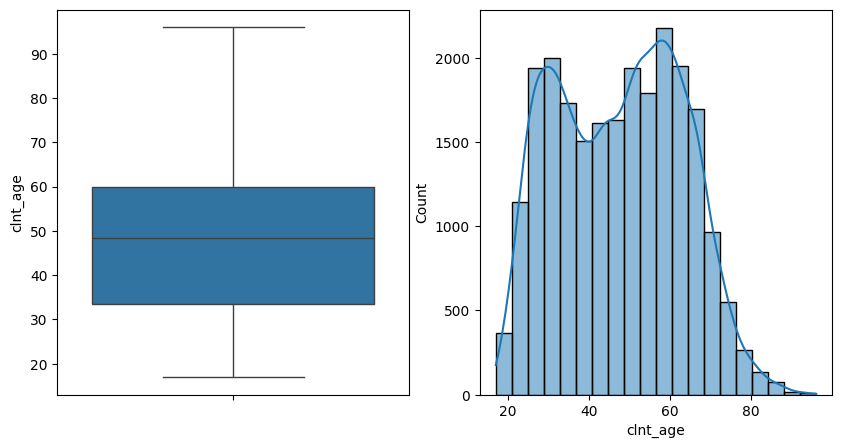

In [99]:
# Age distribution df_demo_control
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(data=df_demo_control, y='clnt_age',ax=axes[0])
sns.histplot(df_demo_control['clnt_age'], kde=True, bins=20, ax=axes[1]);
plt.show()

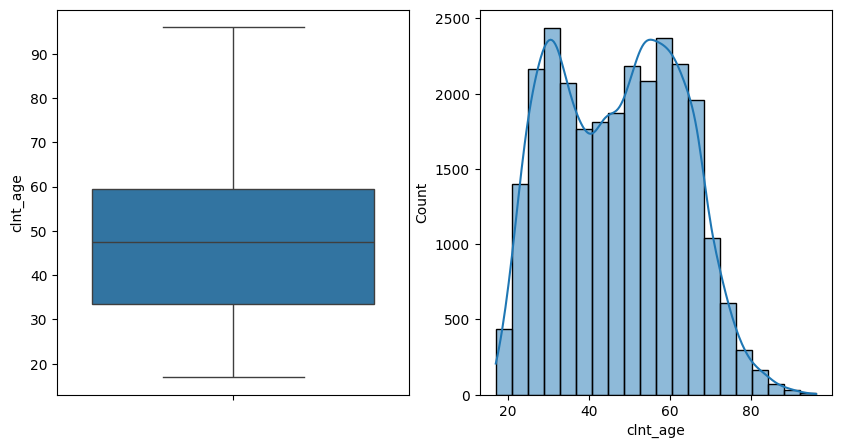

In [100]:
# Age distribution df_demo_test
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(data=df_demo_test, y='clnt_age',ax=axes[0])
sns.histplot(df_demo_test['clnt_age'], kde=True, bins=20, ax=axes[1]);
plt.show()

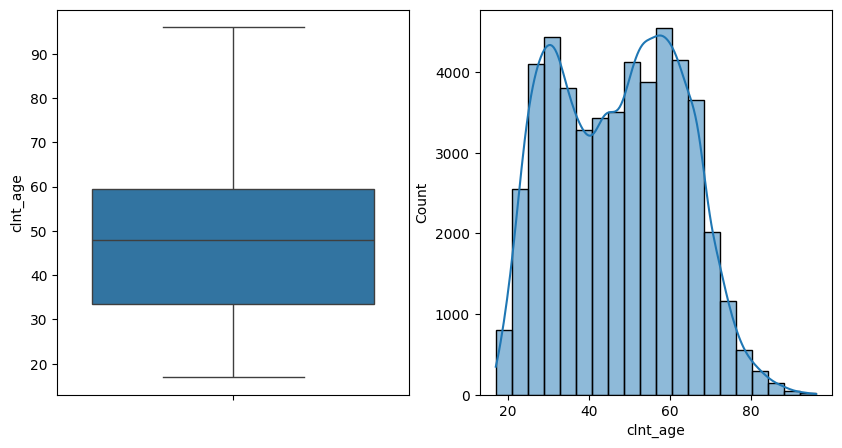

In [101]:
# Age distribution df_demo_variation
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(data=df_demo_variation, y='clnt_age',ax=axes[0])
sns.histplot(df_demo_variation['clnt_age'], kde=True, bins=20, ax=axes[1]);
plt.show()

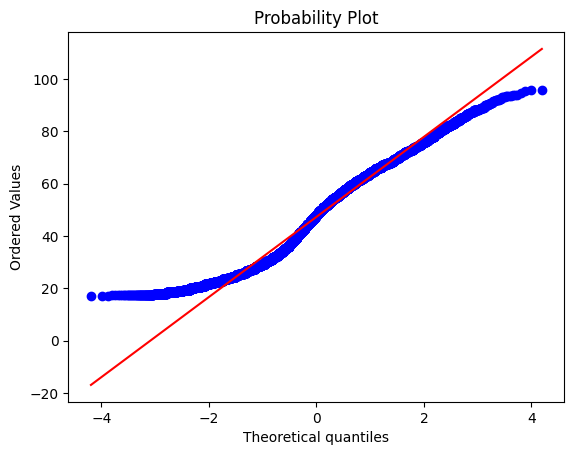

In [102]:
# Q-Q plot
stats.probplot(df_demo_variation['clnt_age'].dropna(), dist="norm", plot=plt)
plt.show()

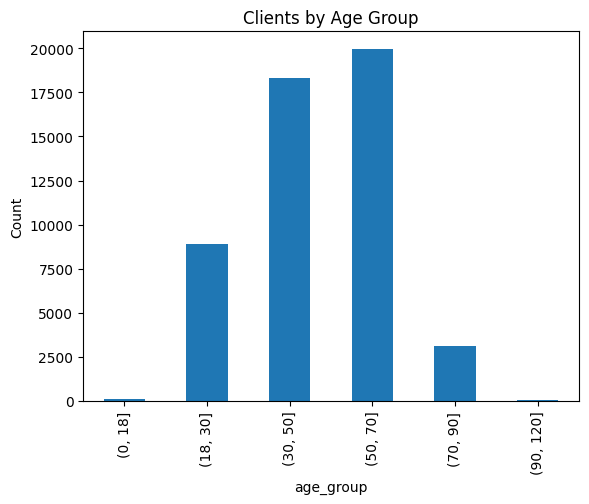

In [103]:
# Age group barplot:
age_bins = [0, 18, 30, 50, 70, 90, 120]
df_demo_variation['age_group'] = pd.cut(df_demo_variation['clnt_age'], bins=age_bins)
df_demo_variation['age_group'].value_counts().sort_index().plot(kind='bar')
plt.title('Clients by Age Group')
plt.ylabel('Count')
plt.show()

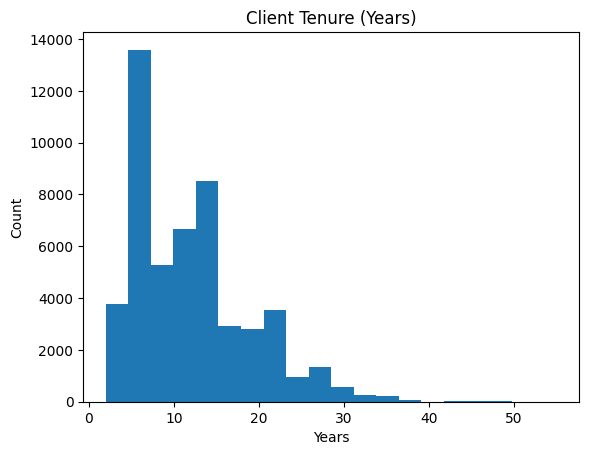

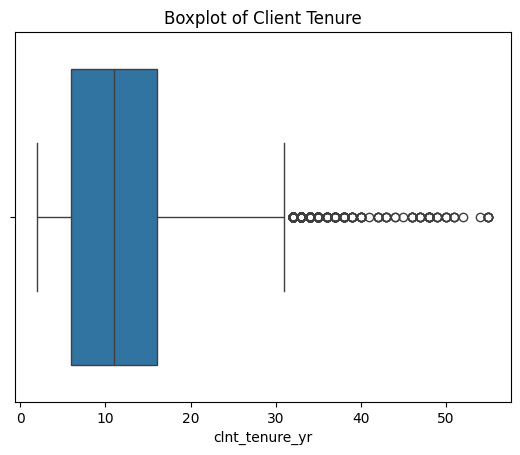

In [104]:
# Tenure Histogram/boxplot

plt.hist(df_demo_variation['clnt_tenure_yr'].dropna(), bins=20)
plt.title('Client Tenure (Years)')
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

sns.boxplot(x=df_demo_variation['clnt_tenure_yr'])
plt.title('Boxplot of Client Tenure')
plt.show()

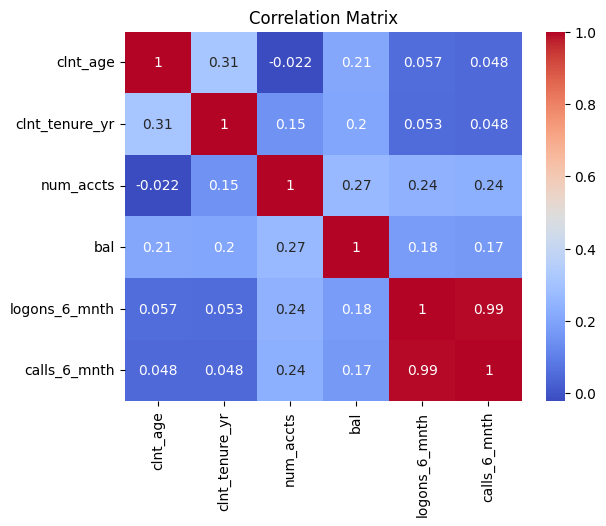

In [105]:
# Correlation matrix/heatmap
corr = df_demo_variation[['clnt_age', 'clnt_tenure_yr', 'num_accts', 'bal', 'logons_6_mnth', 'calls_6_mnth']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

1.5 Missing Data Analysis

In [116]:
# Summarize missing data
display(df_demo_variation.isnull().sum())
display(df_demo_control.isnull().sum())
display(df_demo_test.isnull().sum())

client_id            0
clnt_tenure_yr       0
clnt_tenure_mnth     0
clnt_age             0
num_accts            0
bal                  0
calls_6_mnth         0
logons_6_mnth        0
Variation            0
clnt_age_quantile    0
tenure_quantile      0
age_group            0
dtype: int64

client_id            0
clnt_tenure_yr       0
clnt_tenure_mnth     0
clnt_age             0
num_accts            0
bal                  0
calls_6_mnth         0
logons_6_mnth        0
Variation            0
clnt_age_quantile    0
tenure_quantile      0
dtype: int64

client_id            0
clnt_tenure_yr       0
clnt_tenure_mnth     0
clnt_age             0
num_accts            0
bal                  0
calls_6_mnth         0
logons_6_mnth        0
Variation            0
clnt_age_quantile    0
tenure_quantile      0
dtype: int64

a. Who Are the Primary Clients?

b. Age & Tenure Relationship

In [108]:
# Cross-tab quantiles:
pd.crosstab(df_demo_variation['clnt_age_quantile'], df_demo_variation['tenure_quantile'])

tenure_quantile,T1,T2,T3,T4
clnt_age_quantile,,,,
A1,5449,3574,1738,1124
A2,3079,3461,4278,1884
A3,2830,2961,3589,3355
A4,2434,2968,3383,4380


In [118]:
#  Tenure Correlation with age
df_demo_variation[['clnt_age', 'clnt_tenure_yr']].corr()

,clnt_age,clnt_tenure_yr
clnt_age,1.000000,0.311198
clnt_tenure_yr,0.311198,1.000000


3. Client Behavior Analysis

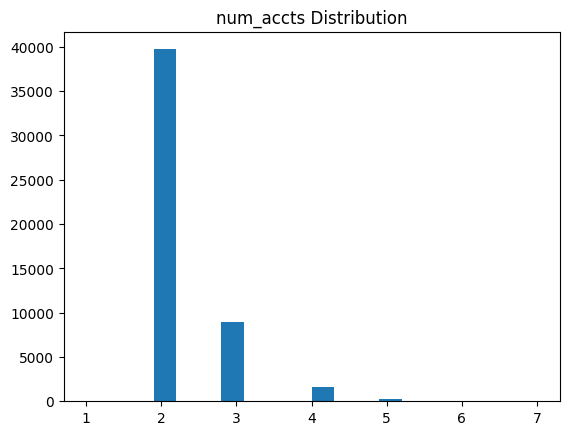

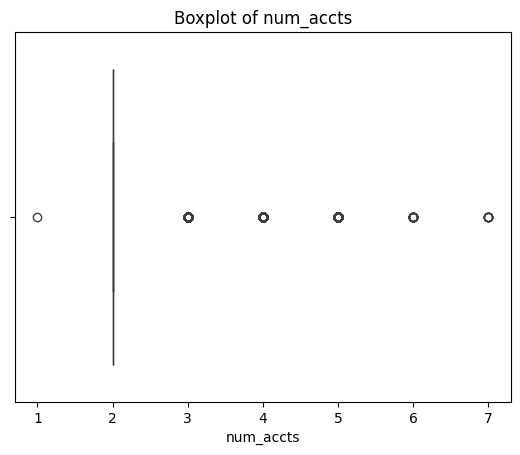

count    50487.000000
mean         2.254580
std          0.533675
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          7.000000
Name: num_accts, dtype: float64


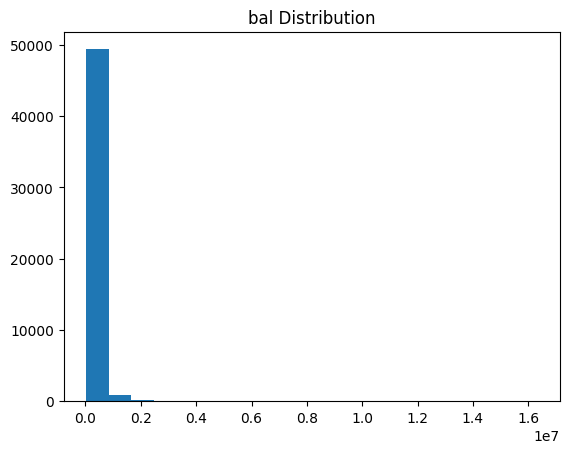

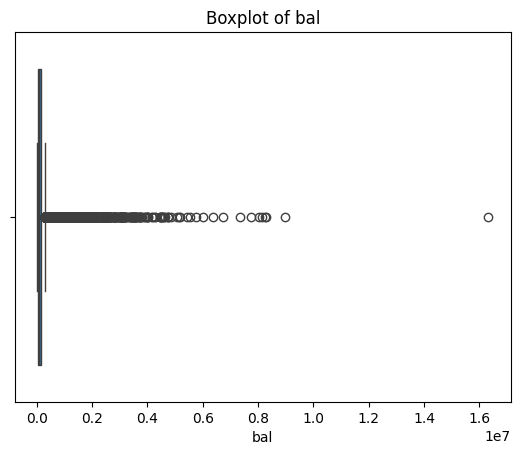

count    5.048700e+04
mean     1.495168e+05
std      3.020390e+05
min      2.378944e+04
25%      3.987718e+04
50%      6.573433e+04
75%      1.399583e+05
max      1.632004e+07
Name: bal, dtype: float64


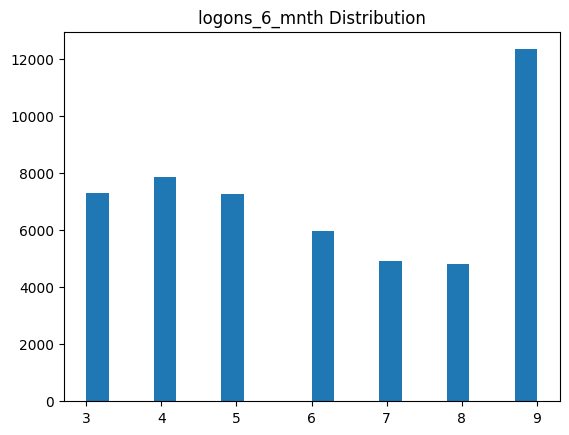

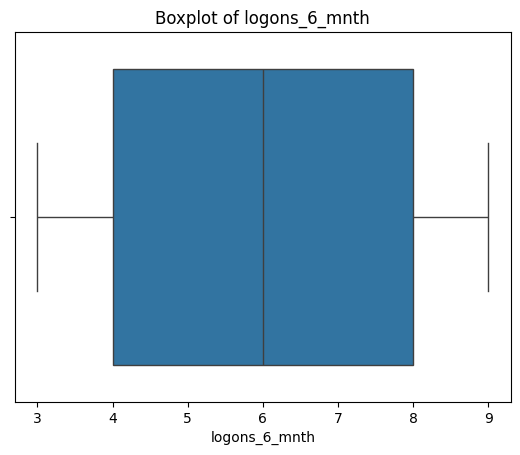

count    50487.000000
mean         6.131856
std          2.175441
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          9.000000
Name: logons_6_mnth, dtype: float64


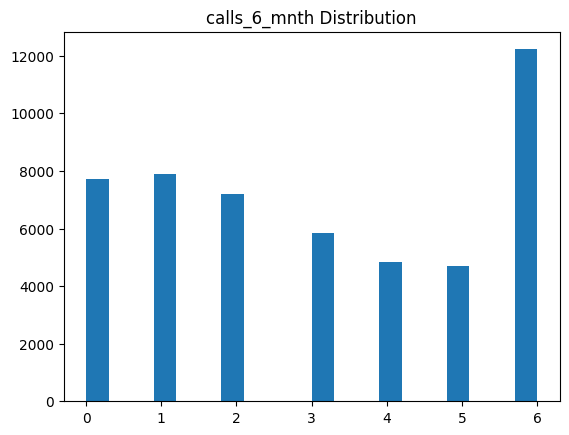

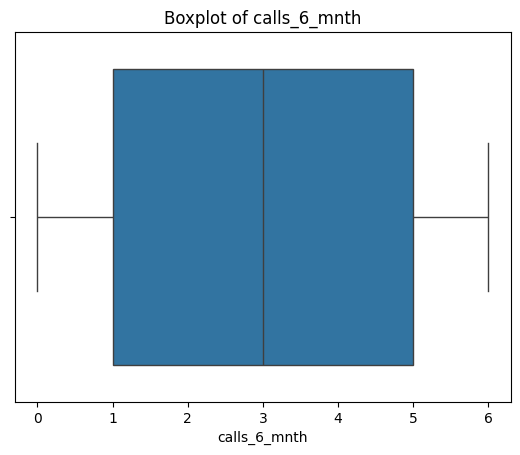

count    50487.000000
mean         3.093272
std          2.188009
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max          6.000000
Name: calls_6_mnth, dtype: float64


In [111]:
# Distribution of logons/calls. For each: number of accounts, balances, logons/calls.
variables = ['num_accts', 'bal', 'logons_6_mnth', 'calls_6_mnth']
for var in variables:
    plt.figure()
    plt.hist(df_demo_variation[var].dropna(), bins=20)
    plt.title(f'{var} Distribution')
    plt.show()
    sns.boxplot(x=df_demo_variation[var])
    plt.title(f'Boxplot of {var}')
    plt.show()
    print(df_demo_variation[var].describe())

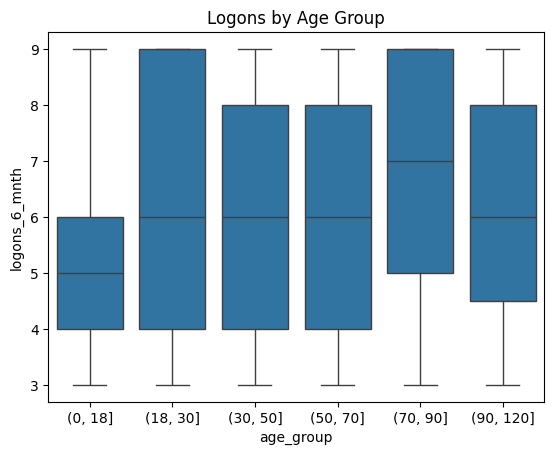

In [112]:
# Are more engaged clients older/younger, or new/long-standing?
# Boxplot or scatter of logons/calls by age/tenure
sns.boxplot(x='age_group', y='logons_6_mnth', data=df_demo_variation)
plt.title('Logons by Age Group')
plt.show()

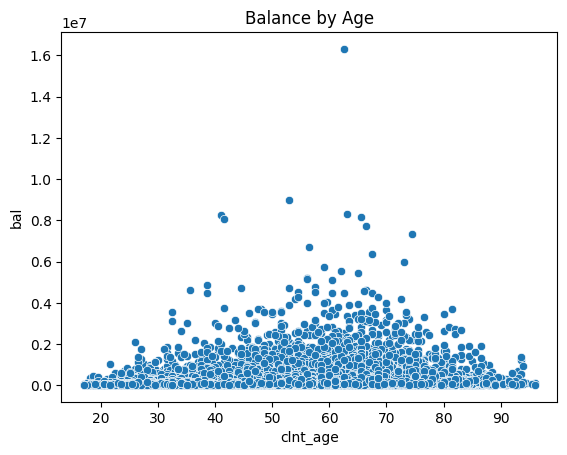

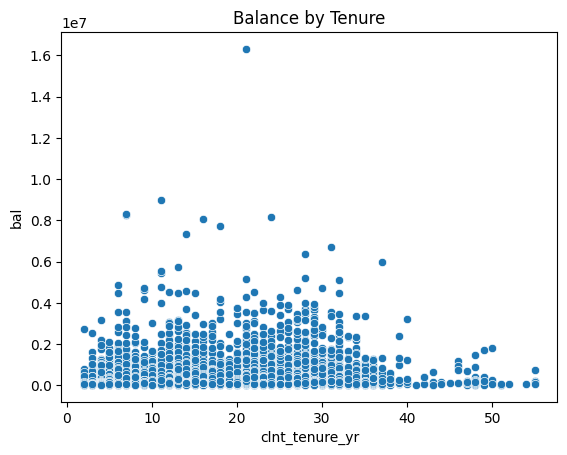

In [113]:
# Balance by age and tenure:
sns.scatterplot(x='clnt_age', y='bal', data=df_demo_variation)
plt.title('Balance by Age')
plt.show()
sns.scatterplot(x='clnt_tenure_yr', y='bal', data=df_demo_variation)
plt.title('Balance by Tenure')
plt.show()

In [114]:
df_demo_variation

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,clnt_age_quantile,tenure_quantile,age_group
0,836976,6.0,73.0,60.5,2.0,45105.30,6.0,9.0,Test,A4,T1,"(50, 70]"
1,2304905,7.0,94.0,58.0,2.0,110860.30,6.0,9.0,Control,A3,T2,"(50, 70]"
2,1439522,5.0,64.0,32.0,2.0,52467.79,6.0,9.0,Test,A1,T1,"(30, 50]"
3,1562045,16.0,198.0,49.0,2.0,67454.65,3.0,6.0,Test,A3,T3,"(30, 50]"
4,5126305,12.0,145.0,33.0,2.0,103671.75,0.0,3.0,Control,A2,T3,"(30, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...
50482,1780858,21.0,262.0,68.5,3.0,372100.59,6.0,9.0,Test,A4,T4,"(50, 70]"
50483,6967120,21.0,260.0,68.5,3.0,4279873.38,6.0,9.0,Control,A4,T4,"(50, 70]"
50484,5826160,20.0,249.0,56.5,2.0,44837.16,2.0,5.0,Test,A3,T4,"(50, 70]"
50485,8739285,19.0,229.0,69.5,2.0,44994.24,1.0,4.0,Test,A4,T4,"(50, 70]"
